Оригинальная работа  https://github.com/sgrvinod/a-PyTorch-Tutorial-to-Object-Detection.git

Ссылка на репо с файлами измененная под BCCD https://github.com/alex-punchenko/BCCD_SSD.git

In [1]:
import warnings
warnings.filterwarnings("ignore")
%reset_selective -f warnings

In [2]:
!git clone https://github.com/Shenggan/BCCD_Dataset.git

Cloning into 'BCCD_Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800 (from 1)
Receiving objects: 100% (800/800), 7.39 MiB | 17.23 MiB/s, done.
Resolving deltas: 100% (378/378), done.


In [3]:
!git clone https://github.com/alex-punchenko/BCCD_SSD.git a-PyTorch-Tutorial-to-Object-Detection

Cloning into 'a-PyTorch-Tutorial-to-Object-Detection'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 21.44 KiB | 563.00 KiB/s, done.


In [4]:
import os
import PIL

In [5]:
os.chdir('/content/a-PyTorch-Tutorial-to-Object-Detection')

In [6]:
!python create_data_lists.py

/content/a-PyTorch-Tutorial-to-Object-Detection/utils.py:545: SyntaxWarning: "is" with 'str' literal. Did you mean "=="?
  if d.__name__ is 'adjust_hue':

TRAIN: 205 images, 2805 objects saved to /content/BCCD_Dataset

TEST: 72 images, 945 objects saved to /content/BCCD_Dataset


In [7]:
!python train.py

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100% 528M/528M [00:03<00:00, 143MB/s] 

Loaded base model.

/usr/local/lib/python3.12/dist-packages/torch/nn/_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format

Остановил после 38. Этого достаточно

In [ ]:
import torch
checkpoint_path = '/content/a-PyTorch-Tutorial-to-Object-Detection/checkpoint_ssd300.pth.tar'
checkpoint = torch.load(checkpoint_path, weights_only=False)
ssd = checkpoint['model']

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
ssd = ssd.to(device)
ssd.eval()

In [13]:
from detect import detect

Результаты

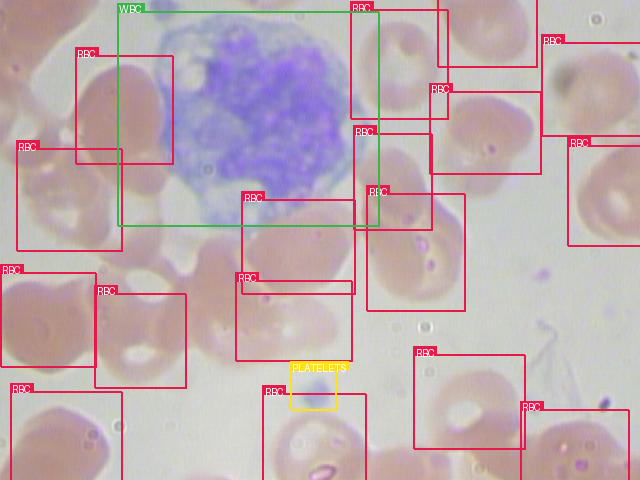

In [37]:
img_path = '/content/BCCD_Dataset/BCCD/JPEGImages/BloodImage_00015.jpg'
original_image = PIL.Image.open(img_path, mode='r')
original_image = original_image.convert('RGB')
annotated_image = detect(original_image, min_score=0.40, max_overlap=0.2, top_k=20)
annotated_image

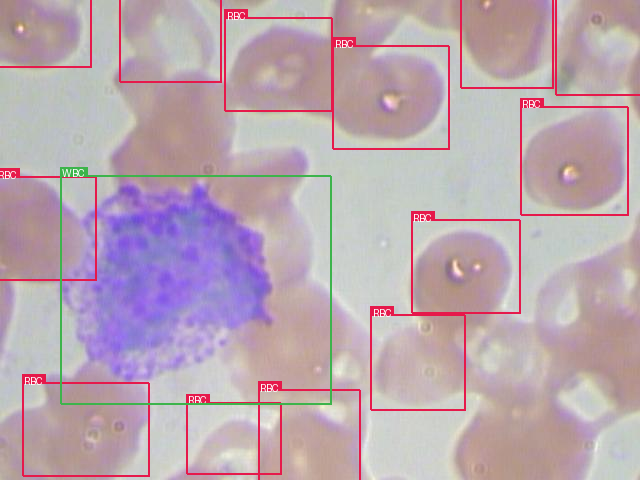

In [38]:
img_path = '/content/BCCD_Dataset/BCCD/JPEGImages/BloodImage_00008.jpg'
original_image = PIL.Image.open(img_path, mode='r')
original_image = original_image.convert('RGB')
annotated_image = detect(original_image, min_score=0.40, max_overlap=0.2, top_k=20)
annotated_image

In [23]:
!python eval.py

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
Evaluating:   0% 0/2 [00:00<?, ?it/s]/content/a-PyTorch-Tutorial-to-Object-Detection/model.py:501: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /pytorch/aten/src/ATen/native/IndexingUtils.h:29.)
  image_boxes.append(class_decoded_locs[1 - suppress])
/content/a-PyTorch-Tutorial-to-Object-Detection/model.py:503: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /pytorch/aten/src/ATen